In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [37]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [38]:
print(data)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [39]:
df = pd.DataFrame(data.data , columns=data.feature_names)
df['price'] = data.target

In [40]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [41]:
X = df.drop('price',axis = 1)
y = df.price

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=1)
model = DecisionTreeRegressor()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)



In [43]:
print(f"Number of nodes: {model.tree_.node_count}")
print(f"Max depth of tree: {model.tree_.max_depth}")


Number of nodes: 31641
Max depth of tree: 37


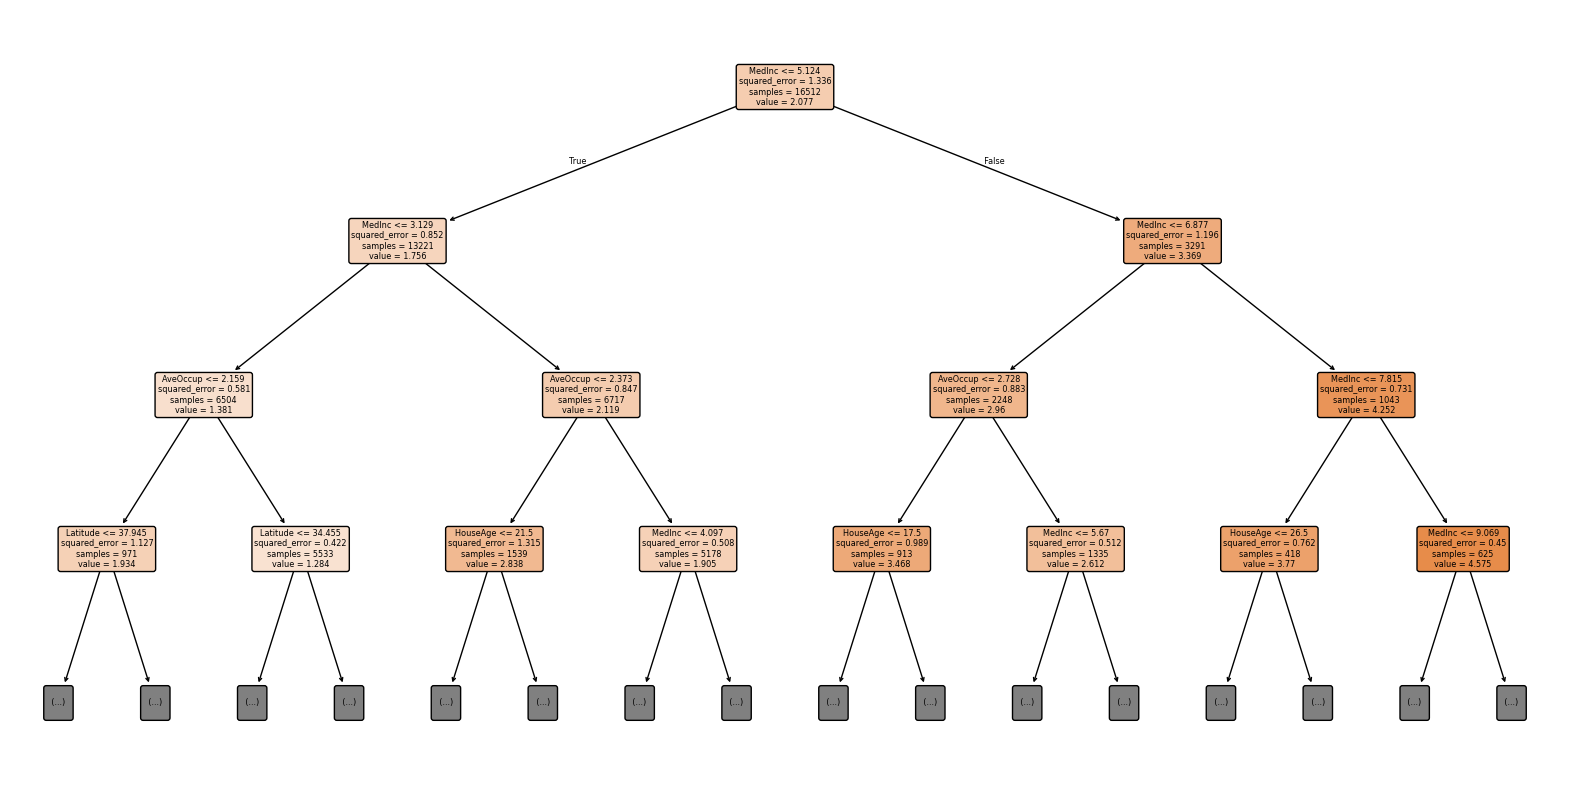

In [44]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(model,
          max_depth=3,
          feature_names=X.columns,
          filled=True,
          rounded=True)
plt.show()


In [45]:
model.feature_importances_

array([0.50633178, 0.05134299, 0.03344096, 0.02975402, 0.03322105,
       0.146034  , 0.0971249 , 0.10275031])

In [46]:
for i, importance in enumerate(importances):
    print(f" {df.columns[i]}: {importance:.4f}")

 MedInc: 0.5071
 HouseAge: 0.0512
 AveRooms: 0.0341
 AveBedrms: 0.0291
 Population: 0.0323
 AveOccup: 0.1460
 Latitude: 0.0975
 Longitude: 0.1028


In [47]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.617866133782607

In [49]:
params = {
    'criterion' : ['squared_error','absolute_error'],
    'max_depth' : [None, 5, 10, 15],
    'max_features' : ['sqrt', 'log2'],
    'splitter' : ['best', 'random']
}

In [54]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5)
y_grid_prid = grid_search.fit(X_train, y_train)


In [56]:
y_grid_prid = grid_search.best_estimator_.predict(X_test)
r2_score(y_test , y_grid_prid)

0.6802652262325353